In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 

In [3]:
df=pd.read_csv("C:/Users/Om Kapdoskar/Desktop/diamonds.csv")
df['volume'] = df['x']*df['y']*df['z'] #Adding volume columne to the dataset
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z', 'volume'],
      dtype='object')

In [4]:
df[['x','y','z']] = df[['x','y','z']].replace(0,np.NaN)
df.dropna(inplace=True)

In [5]:
cut = ['Fair','Good','Very Good','Premium','Ideal']
oe = OrdinalEncoder(categories= [cut])
df['cut_enc'] = oe.fit_transform(df[['cut']])
color = ['D','E','F','G','H','I','J']
oe = OrdinalEncoder(categories= [color])
df['color_enc'] = oe.fit_transform(df[['color']])
clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
oe = OrdinalEncoder(categories= [clarity])
df['clarity_enc'] = oe.fit_transform(df[['clarity']])


In [6]:
X=df[[ 'carat','cut_enc', 'color_enc', 'clarity_enc']]
y=df['price']

In [7]:
lm = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm.fit(X_train, y_train)

LinearRegression()

In [8]:
predict=lm.predict(X_test)
pred=X_test
pred['Price']=y_test
pred['Prediction']=predict.tolist()
pred['Error']=pred['Price']-pred['Prediction']
print(pred)

       carat  cut_enc  color_enc  clarity_enc  Price    Prediction  \
34704   0.31      3.0        2.0          7.0    874   1920.018710   
21099   1.29      4.0        4.0          4.0   9273   8462.341626   
23685   1.52      3.0        2.0          2.0  11743   9911.917153   
39200   0.41      1.0        2.0          5.0   1064   1430.718020   
35560   0.35      3.0        3.0          4.0    906    386.108854   
...      ...      ...        ...          ...    ...           ...   
6432    1.02      4.0        0.0          1.0   4044   5810.202734   
14694   1.00      2.0        4.0          5.0   5929   6121.358325   
20508   1.70      3.0        5.0          4.0   8840  11573.512418   
49621   0.32      2.0        2.0          1.0    540  -1283.092030   
45357   0.67      1.0        0.0          1.0   1664   2260.937511   

             Error  
34704 -1046.018710  
21099   810.658374  
23685  1831.082847  
39200  -366.718020  
35560   519.891146  
...            ...  
6432  -1766.

In [12]:
c=pred[pred['Error'].abs()<400]
a=pred['Error'].abs()
print(c)
print(a.mean())

       carat  cut_enc  color_enc  clarity_enc  Price   Prediction       Error
39200   0.41      1.0        2.0          5.0   1064  1430.718020 -366.718020
35237   0.39      3.0        2.0          4.0    894  1056.012328 -162.012328
50365   0.70      1.0        0.0          1.0   2247  2523.746123 -276.746123
4853    0.71      4.0        2.0          4.0   3710  4020.359107 -310.359107
50053   0.71      2.0        3.0          2.0   2201  2335.537719 -134.537719
...      ...      ...        ...          ...    ...          ...         ...
49692   0.71      1.0        5.0          3.0   2145  2057.108603   87.891397
43886   0.54      4.0        5.0          4.0   1453  1572.634331 -119.634331
21764   1.52      3.0        1.0          1.0   9831  9709.799362  121.200638
48820   0.72      2.0        6.0          3.0   2028  1986.274398   41.725602
14694   1.00      2.0        4.0          5.0   5929  6121.358325 -192.358325

[3448 rows x 7 columns]
841.3067205460006


In [1]:
tes=predict
tes2 = y_test.tolist()
plt.scatter(tes,pred.index,label="Prediction")
plt.scatter(tes2,pred.index,label="Price")

NameError: name 'predict' is not defined

Using Only One Variable as a dependent Variable

In [83]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
df=pd.read_csv("C:/Users/Om Kapdoskar/Desktop/diamonds.csv")
df['volume'] = df['x']*df['y']*df['z'] #Adding volume column to the dataset
df[['x','y','z']] = df[['x','y','z']].replace(0,np.NaN)
df.dropna(inplace=True)
cut = ['Fair','Good','Very Good','Premium','Ideal']
oe = OrdinalEncoder(categories= [cut])
df['cut_enc'] = oe.fit_transform(df[['cut']])
color = ['D','E','F','G','H','I','J']
oe = OrdinalEncoder(categories= [color])
df['color_enc'] = oe.fit_transform(df[['color']])
clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
oe = OrdinalEncoder(categories= [clarity])
df['clarity_enc'] = oe.fit_transform(df[['clarity']])
X=df[[ 'carat']]
y=df['price']
lm = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm.fit(X_train, y_train)
predict=lm.predict(X_test)
pred=X_test
pred['Price']=y_test
pred['Prediction']=predict.tolist()
pred['Error'] = pred['Prediction']-pred['Price']
print(pred)
a=pred['Error'].abs()
print(a.mean())

       carat  Price    Prediction        Error
34704   0.31    874    157.929021  -716.070979
21099   1.29   9273   7736.817237 -1536.182763
23685   1.52  11743   9515.535900 -2227.464100
39200   0.41   1064    931.284961  -132.715039
35560   0.35    906    467.271397  -438.728603
...      ...    ...           ...          ...
6432    1.02   4044   5648.756198  1604.756198
14694   1.00   5929   5494.085010  -434.914990
20508   1.70   8840  10907.576592  2067.576592
49621   0.32    540    235.264615  -304.735385
45357   0.67   1664   2942.010406  1278.010406

[10784 rows x 4 columns]
1001.1026237263367


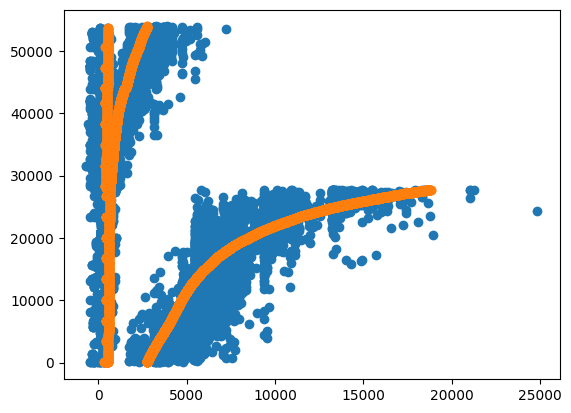

In [84]:
tes=predict
tes2 = y_test.tolist()
plt.scatter(tes,pred.index,label="Prediction")
plt.scatter(tes2,pred.index,label="Price")

In [17]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
df=pd.read_csv("C:/Users/Om Kapdoskar/Desktop/diamonds.csv")
df[['x','y','z']] = df[['x','y','z']].replace(0,np.NaN)
df.dropna(inplace=True)
df['volume'] = df['x']*df['y']*df['z'] #Adding volume columne to the dataset
cut = ['Fair','Good','Very Good','Premium','Ideal']
oe = OrdinalEncoder(categories= [cut])
df['cut_enc'] = oe.fit_transform(df[['cut']])
color = ['D','E','F','G','H','I','J']
oe = OrdinalEncoder(categories= [color])
df['color_enc'] = oe.fit_transform(df[['color']])
clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
oe = OrdinalEncoder(categories= [clarity])
df['clarity_enc'] = oe.fit_transform(df[['clarity']])
X=df[['volume']]
y=df['price']
lm = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm.fit(X_train, y_train)
predict=lm.predict(X_test)
pred=X_test
pred['Price']=y_test
pred['Prediction']=predict.tolist()
pred['Error'] = pred['Prediction']-pred['Price']
a=pred['Error'].abs()
print(pred)
print(a.mean())

       carat  depth  table  Price    Prediction        Error
34704   0.31   60.8   59.0    874     93.971406  -780.028594
21099   1.29   61.8   56.0   9273   7926.868267 -1346.131733
23685   1.52   62.6   59.0  11743   9301.828979 -2441.171021
39200   0.41   63.6   56.0   1064    764.073206  -299.926794
35560   0.35   61.5   58.0    906    404.543231  -501.456769
...      ...    ...    ...    ...           ...          ...
6432    1.02   62.5   57.0   4044   5604.827942  1560.827942
14694   1.00   60.3   59.0   5929   5573.605710  -355.394290
20508   1.70   61.5   58.0   8840  10978.888234  2138.888234
49621   0.32   63.1   56.0    540    134.085952  -405.914048
45357   0.67   64.7   55.0   1664   2737.896360  1073.896360

[10784 rows x 6 columns]
983.8115915216731


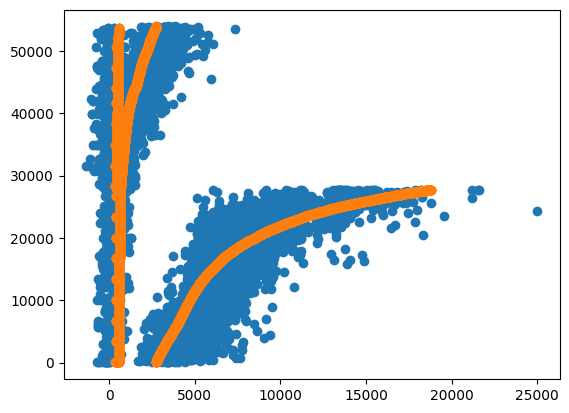

In [18]:
tes=predict
tes2 = y_test.tolist()
plt.scatter(tes,pred.index,label="Prediction")
plt.scatter(tes2,pred.index,label="Price")

Predicting Using Different Regressions

Ridge

       carat  cut_enc  clarity_enc      volume  Price    Prediction  \
34704   0.31      3.0          7.0   50.913464    874   1729.658987   
21099   1.29      4.0          4.0  211.375008   9273   8673.119983   
23685   1.52      3.0          2.0  245.062976  11743   9485.611832   
39200   0.41      1.0          5.0   66.047904   1064   1298.163243   
35560   0.35      3.0          4.0   56.795400    906    644.213595   
...      ...      ...          ...         ...    ...           ...   
6432    1.02      4.0          1.0  164.093600   4044   4989.241790   
14694   1.00      2.0          5.0  160.665368   5929   6393.451050   
20508   1.70      3.0          4.0  279.701928   8840  11946.432223   
49621   0.32      2.0          1.0   52.275300    540  -1185.658197   
45357   0.67      1.0          1.0  108.777900   1664   1582.319072   

             Error  
34704   855.658987  
21099  -599.880017  
23685 -2257.388168  
39200   234.163243  
35560  -261.786405  
...            ...  


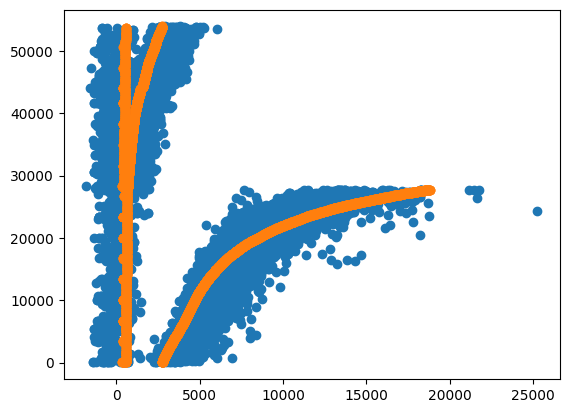

In [13]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import Ridge
df=pd.read_csv("C:/Users/Om Kapdoskar/Desktop/diamonds.csv")
df[['x','y','z']] = df[['x','y','z']].replace(0,np.NaN)
df.dropna(inplace=True)
df['volume'] = df['x']*df['y']*df['z'] #Adding volume columne to the dataset
cut = ['Fair','Good','Very Good','Premium','Ideal']
oe = OrdinalEncoder(categories= [cut])
df['cut_enc'] = oe.fit_transform(df[['cut']])
color = ['D','E','F','G','H','I','J']
oe = OrdinalEncoder(categories= [color])
df['color_enc'] = oe.fit_transform(df[['color']])
clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
oe = OrdinalEncoder(categories= [clarity])
df['clarity_enc'] = oe.fit_transform(df[['clarity']])
X=df[[ 'carat','cut_enc','clarity_enc','volume']]
y=df['price']
lm = Ridge()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm.fit(X_train, y_train)
predict=lm.predict(X_test)
pred=X_test
pred['Price']=y_test
pred['Prediction']=predict.tolist()
pred['Error'] = pred['Prediction']-pred['Price']
a=pred['Error'].abs()
print(pred)
print(a.mean())
tes=predict
tes2 = y_test.tolist()
plt.scatter(tes,pred.index,label="Prediction")
plt.scatter(tes2,pred.index,label="Price")

Lasso

       carat  cut_enc  color_enc  clarity_enc  Price    Prediction  \
34704   0.31      3.0        2.0          7.0    874   1918.881601   
21099   1.29      4.0        4.0          4.0   9273   8458.301019   
23685   1.52      3.0        2.0          2.0  11743   9907.287848   
39200   0.41      1.0        2.0          5.0   1064   1432.625490   
35560   0.35      3.0        3.0          4.0    906    388.585325   
...      ...      ...        ...          ...    ...           ...   
6432    1.02      4.0        0.0          1.0   4044   5807.325793   
14694   1.00      2.0        4.0          5.0   5929   6120.113291   
20508   1.70      3.0        5.0          4.0   8840  11568.414857   
49621   0.32      2.0        2.0          1.0    540  -1277.477597   
45357   0.67      1.0        0.0          1.0   1664   2263.145920   

             Error  
34704 -1044.881601  
21099   814.698981  
23685  1835.712152  
39200  -368.625490  
35560   517.414675  
...            ...  
6432  -1763.

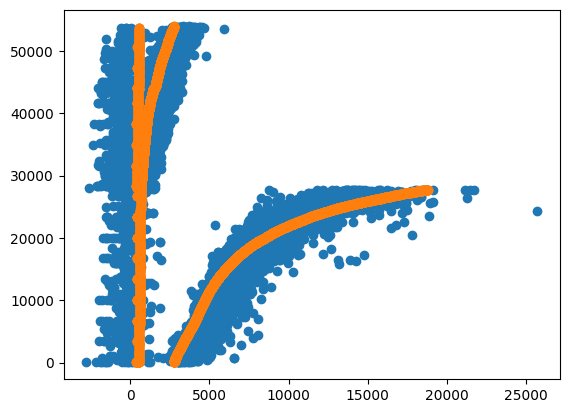

In [88]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn import linear_model
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import Ridge
df=pd.read_csv("C:/Users/Om Kapdoskar/Desktop/diamonds.csv")
df[['x','y','z']] = df[['x','y','z']].replace(0,np.NaN)
df.dropna(inplace=True)
df['volume'] = df['x']*df['y']*df['z'] #Adding volume columne to the dataset
cut = ['Fair','Good','Very Good','Premium','Ideal']
oe = OrdinalEncoder(categories= [cut])
df['cut_enc'] = oe.fit_transform(df[['cut']])
color = ['D','E','F','G','H','I','J']
oe = OrdinalEncoder(categories= [color])
df['color_enc'] = oe.fit_transform(df[['color']])
clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
oe = OrdinalEncoder(categories= [clarity])
df['clarity_enc'] = oe.fit_transform(df[['clarity']])
X=df[[ 'carat','cut_enc', 'color_enc', 'clarity_enc']]
y=df['price']
lm = Lasso()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm.fit(X_train, y_train)
predict=lm.predict(X_test)
pred=X_test
pred['Price']=y_test
pred['Prediction']=predict.tolist()
pred['Error']=pred['Price']-pred['Prediction']
a=pred['Error'].abs()
print(pred)
print(a.mean())
tes=predict
tes2 = y_test.tolist()
plt.scatter(tes,pred.index,label="Prediction")
plt.scatter(tes2,pred.index,label="Price")